In [1]:
import pandas as pd

# **Создание дата-фрэйма**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [3]:
df.count()

,0
survived,891
pclass,891
sex,891
age,714
sibsp,891
parch,891
fare,891
embarked,889
class,891
who,891


# **Очистка данных**

In [4]:
cleaned_df = df.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     182 non-null    int64  
 1   pclass       182 non-null    int64  
 2   sex          182 non-null    object 
 3   age          182 non-null    float64
 4   sibsp        182 non-null    int64  
 5   parch        182 non-null    int64  
 6   fare         182 non-null    float64
 7   embarked     182 non-null    object 
 8   class        182 non-null    object 
 9   who          182 non-null    object 
 10  adult_male   182 non-null    bool   
 11  deck         182 non-null    object 
 12  embark_town  182 non-null    object 
 13  alive        182 non-null    object 
 14  alone        182 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 20.3+ KB


# **Group by**

In [5]:
cleaned_df.groupby('pclass').size() # Сколько людей в каждом классе при применении Group by
cleaned_df['pclass'].value_counts() # Сколько людей в каждом классе

,count
pclass,
1,157
2,15
3,10


In [6]:
# Вывести статистику по возрасту для каждого пола (мужской, женский)
cleaned_df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,88.0,32.676136,14.240552,2.00,22.75,32.25,41.5,63.0
male,94.0,38.382128,16.503731,0.92,28.00,37.00,49.0,80.0


In [7]:
# Вывести среднее значение по возрасту для каждого класса
cleaned_df.groupby('pclass')['age'].mean()

,age
pclass,
1,37.544076
2,25.266667
3,21.000000


In [8]:
# Сравните шансы выживания пассажиров, которые путешествовали одни/с кем-то
df.groupby('alone')['survived'].mean()

,survived
alone,
False,0.505650
True,0.303538


In [9]:
# Вывести медианное значение для каждого класса и пола одновременно
cleaned_df.groupby(['pclass', 'sex'])['age'].median()

pclass  sex   
1       female    34.0
        male      40.0
2       female    29.0
        male      18.5
3       female    24.0
        male      25.0
Name: age, dtype: float64

In [10]:
# Вывести долю выживших в каждом классе
df.groupby('pclass')['survived'].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
# Посчитть долю выживших для каждой комбинации (sex, pclass). Определть, у какой группы шансы на выживание были выше всего
df_survived_filter = df.groupby(['sex', 'pclass'])['survived'].mean().sort_values(ascending = False)
df_survived_filter.head(3)

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
Name: survived, dtype: float64

In [12]:
# Определить среднюю стоимость билета по полу и классу одновременно
df.groupby(['sex', 'pclass'])['fare'].mean()

sex     pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: fare, dtype: float64

In [13]:
# Вывести информацию сколько пассажиров каждого пола в каждом классе
df.groupby(['sex', 'pclass'])['who'].count()

sex     pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: who, dtype: int64

# **Agg**

In [14]:
# Отобрать максимальную и минимальную стоимость билетов
cleaned_df['fare'].agg(['max', 'min'])

,fare
max,512.3292
min,0.0000


In [15]:
# Найти средний, медианный и стандартное отклонение возраста по каждому классу
df.groupby('pclass')['age'].agg(['mean', 'median', 'std'])

,mean,median,std
pclass,,,
1,38.233441,37.0,14.802856
2,29.877630,29.0,14.001077
3,25.140620,24.0,12.495398


In [16]:
# Необходимо посчитать количество пассажиров и долю выживших по каждой палубе
deck_stats = (
    df.groupby('embarked')
      .agg(count_survived=('survived', 'count'),
           survival_rate=('survived', 'mean'))
      .sort_index())

deck_stats

,count_survived,survival_rate
embarked,,
C,168,0.553571
Q,77,0.389610
S,644,0.336957


# **Value_counts**

In [17]:
# Определить сколько человек ехало в каждом классе
df['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [18]:
# Определить сколько женщин и мужчин было на борту
df['sex'].value_counts()

,count
sex,
male,577
female,314


In [19]:
# Определить сколько уникальных значений у порта посадки (embarked) ....
df['embarked'].nunique()

3

In [20]:
# .... и как они распределились
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [21]:
# Определить какие уникальные значения у порта посадки (embarked) ....
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
# Посчитать количество пассажиров на каждой палубе
df['embarked'].value_counts().sort_index()

,count
embarked,
C,168
Q,77
S,644


# **Фильтры**

In [23]:
# Выбрать пассажиров младше 18 лет. Сколько их?
less_eighteen = df[df['age'] < 18]
less_eighteen
len(less_eighteen)

113

In [24]:
# Найти женщин 1-го класса старше 30 лет
woman_first_class_more_thirty = df[(df['pclass'] == 1) & (df['age'] > 30)]
woman_first_class_more_thirty


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True


In [25]:
# Посчить, сколько пассажиров с ценой билета выше 100 выжило
len(df[(df['fare'] > 100) & (df['survived'] == 1)])

39

In [26]:
# Выберать пассажиров без информации об возрасте
age_null = df[df['age'].isnull()]
age_null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [27]:
# Для каждого столбца посчить долю пропущенных значений.
is_null_column = df.isnull().mean().sort_values(ascending=False)
# Найти топ-3 столбца с наибольшим количеством пропусков.
is_null_column.head(3)

,0
deck,0.772166
age,0.198653
embarked,0.002245


In [28]:
# Найти пассажиров: у которых fare выше среднего, возраст меньше медианного и которые выжили.
filter_fare_age_survived = df[(df['fare'] > df['fare'].mean()) & (df['age'] < df['age'].median()) &
                              (df['survived'] == 1)]
filter_fare_age_survived
# Сколько таких пассажиров?
len(filter_fare_age_survived) # or
filter_fare_age_survived.shape[0] # or

43

In [29]:
# Вывести 10 пассажиров с самой высокой стоимостью билета
fare_sort = df.sort_values(by='fare', ascending=False)

# Отобрать выживших
fare_sort = fare_sort[fare_sort['survived'] == 1].head(10)

# Вывести класс, стоимость билета и пол этих пасажиров
fare_sort[['class', 'fare', 'sex']]

# Вывести тоже самое одним запросом
df[df['survived'] == 1][['class', 'fare', 'sex']] \
  .nlargest(10, 'fare')

,class,fare,sex
258,First,512.3292,female
679,First,512.3292,male
737,First,512.3292,male
88,First,263.0000,female
341,First,263.0000,female
311,First,262.3750,female
742,First,262.3750,female
299,First,247.5208,female
380,First,227.5250,female
700,First,227.5250,female


# **Сводные таблицы**

In [30]:
# Сделть сводную таблицу выживаемости по полу и классу
df.pivot_table(values='survived', index='pclass', columns='sex', aggfunc='mean')

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [31]:
# Сделть сводную таблицу выживаемости по полу и палубе
df.pivot_table(values='survived', columns='sex', index='embarked')

sex,female,male
embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


# **Добавление данных**

In [32]:
# Добавь новый признак: размер семьи на борту
df['family_size'] = df['parch'] + df['sibsp'] + 1
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [34]:
# Из колонки embark_town необходимо взять первую букву (палубу)
df['embark_town'].str.slice(stop=1)

# Создание столбца палуба по срезу
df['paluba']=df['embark_town'].str.slice(stop=1) # or
#df['paluba'] = df['embark_town'].dropna().srt[0] # or
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,paluba
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,S
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,S
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4,S
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1,C


# **Plot**

<Axes: xlabel='sex'>

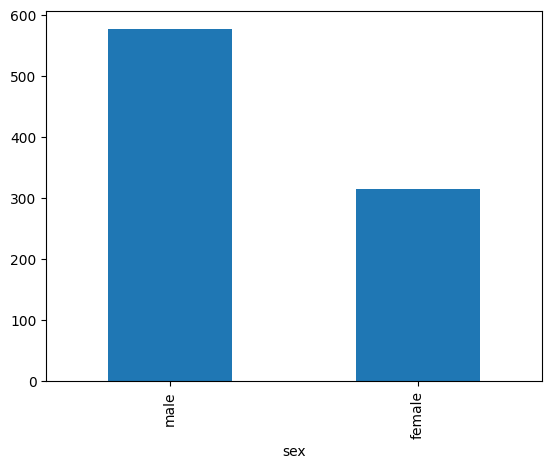

In [72]:
# Постройте распределение пола среди всех пассажиров
df['sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

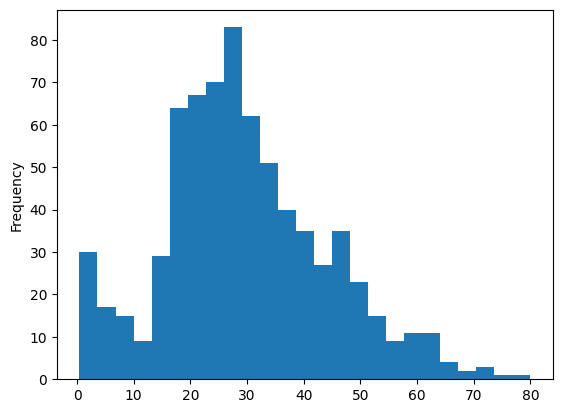

In [41]:
# Постройте распределениe возраста пассажиров
df['age'].plot(kind='hist', bins=25)

<Axes: xlabel='pclass'>

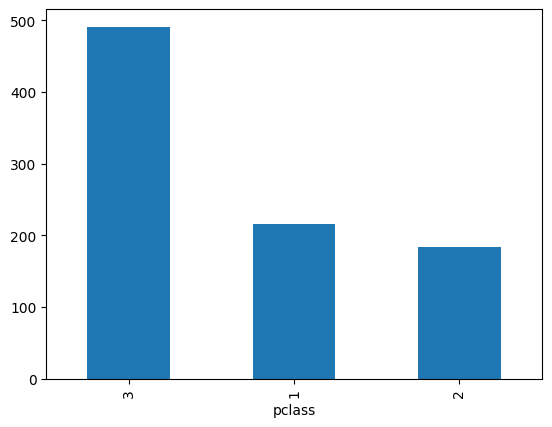

In [57]:
# Постройте распределение количества пассажиров по каждому классу
df['pclass'].value_counts(sort=False).plot(kind='bar')

<Axes: title={'center': 'Распределение выживших по класу'}, ylabel='survived'>

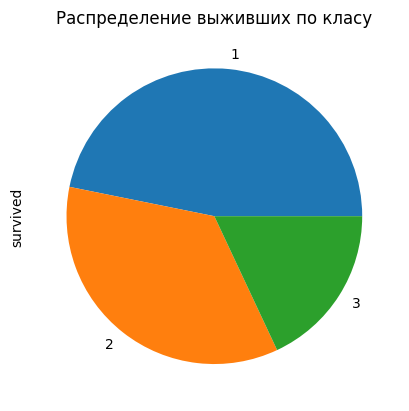

In [66]:
# Составьте распределение доли выживших в каждом классе
df.groupby('pclass')['survived'].mean().plot(kind='pie', title='Распределение выживших по класу')

,age
sex,
female,"Axes(0.125,0.11;0.775x0.77)"
male,"Axes(0.125,0.11;0.775x0.77)"


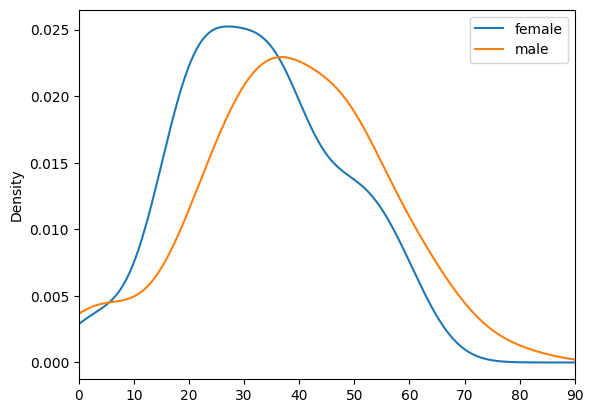

In [35]:
# Построить распределение возраста отдельно для каждого пола
cleaned_df.groupby('sex')['age'].plot(kind='kde', xlim=[0,90], legend = True)

,age
survived,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


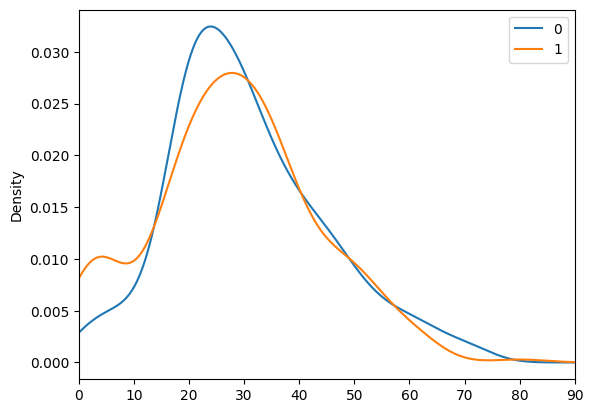

In [36]:
# Построить распределение возраста отдельно для выживших и невыживших
df.groupby('survived')['age'].plot(kind = 'kde', xlim = [0,90], legend = True)

<Axes: title={'center': 'Доля выживших в зависимости от размера семьи'}, xlabel='family_size', ylabel='Survival rate'>

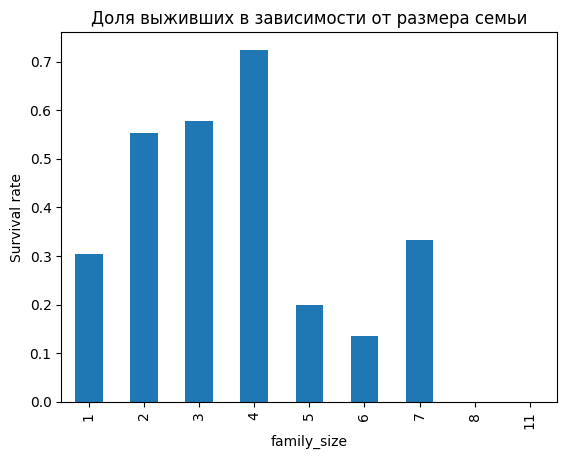

In [37]:
# Пострить зависимость доли выживших от family_size
survival_by_family = df.groupby('family_size')['survived'].mean()
survival_by_family.plot(kind = 'bar', xlim=[1,11], ylabel='Survival rate', title='Доля выживших в зависимости от размера семьи')